In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable

## Load data

In [2]:
train_dataset = datasets.MNIST(root='D:/dev/data/mnist', train=True, transform=transforms.ToTensor(), download=True)
print(len(train_dataset))

60000


In [3]:
print(train_dataset[0][0].size(), train_dataset[0][1])

torch.Size([1, 28, 28]) tensor(5)


In [4]:
test_dataset = datasets.MNIST(root='D:/dev/data/mnist', train=False, transform=transforms.ToTensor(), download=True)
print(len(test_dataset))

10000


## Display MNIST

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
print(train_dataset[0][0].numpy().shape)

(1, 28, 28)


In [7]:
show_img = train_dataset[0][0].numpy().reshape(28,28)

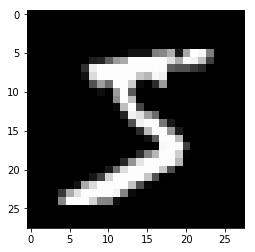

In [8]:
plt.imshow(show_img, cmap='gray')

In [9]:
# Label
print(train_dataset[0][1].numpy())

5


## Make dataset iterable

In [10]:
len(train_dataset)

60000

In [11]:
batch_size = 100

In [12]:
n_iters = 3000

In [13]:
n_epochs = int(n_iters / (len(train_dataset)/batch_size))
print(n_epochs)

5


### Create iterable object : Training dataset

In [14]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

### Check iterability

In [15]:
import collections

In [16]:
isinstance(train_loader, collections.Iterable)

True

### Create iterable object : Test dataset

In [17]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Check iterability

In [18]:
isinstance(test_loader, collections.Iterable)

True

## Build model

In [29]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dims, output_dims):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(in_features=input_dims, out_features=output_dims)
        
    def forward(self, x):
        return self.linear(x)

## Instatiate model

In [30]:
input_dims = 28*28
output_dims = 10
logistic_reg = LogisticRegressionModel(input_dims, output_dims)

## Instantiate loss class

In [31]:
criterion = nn.CrossEntropyLoss()

## model.parameters() explained

In [36]:
print(logistic_reg.parameters())
print(len(list(logistic_reg.parameters())))

print(list(logistic_reg.parameters())[0].size())
print(list(logistic_reg.parameters())[1].size())

<generator object Module.parameters at 0x00000209CC86F0F8>
2
torch.Size([10, 784])
torch.Size([10])


## Optimizer

In [51]:
learning_rate = 0.001
optimizer = torch.optim.SGD(logistic_reg.parameters(), lr=learning_rate)

## Training phase

In [53]:
iteration = 0
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = logistic_reg(images)
        
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        iteration += 1
        
        if iteration%500 == 0:
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                images = Variable(images.view(-1,28*28))
                labels = Variable(labels)
                
                outputs = logistic_reg(images)
                
                predicted = torch.argmax(outputs, dim=1)
                
                total += labels.size()[0]
                
                correct += (predicted == labels).sum()
                
                
            accuracy = 100*correct/total
            
            print('Epoch: {}, Iteration: {}, Loss: {}, Accuracy: {}%'.format(epoch, iteration, loss, accuracy))
                            

Epoch: 0, Iteration: 500, Loss: 0.7428339123725891, Accuracy: 85%
Epoch: 1, Iteration: 1000, Loss: 0.6229871511459351, Accuracy: 85%
Epoch: 2, Iteration: 1500, Loss: 0.7391449213027954, Accuracy: 86%
Epoch: 3, Iteration: 2000, Loss: 0.7023756504058838, Accuracy: 86%
Epoch: 4, Iteration: 2500, Loss: 0.6481443643569946, Accuracy: 86%
Epoch: 4, Iteration: 3000, Loss: 0.670168399810791, Accuracy: 86%


## Show test images

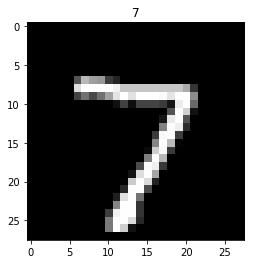

In [56]:
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    
    plt.imshow(images[0].view(28,28).numpy(), cmap='gray')
    plt.title(labels[0].numpy())
    
    break